<a href="https://colab.research.google.com/github/ibonetc/DataAnalytics_Text/blob/master/DA_Anal_Sentimientos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de sentimientos
Existen dos formas clásicas de hacer análisis de sentimientos:

* Enfoque basado en tokens: A partir de un diccionario de palabras positivas, negativas y neutrales, se cuentan la cantidad de palabras positivas y negativas en el texto y se determina el sentimiento del texto como la cantidad que prevalece.

* Enfoque basado en aprendizaje automático: a partir de una base de conocimientos con datos preetiquetados en  positivo, negativo y neutral, se entrena un modelo de aprendizaje automático para clasificar el texto.

El análisis de sentimientos es una forma de evaluar lo que se dice en un texto sobre un tema determinado. Se puntúa utilizando valores de polaridad que van de 1 a -1. Los valores más cercanos a 1 indican más positividad, mientras que los valores más cercanos a -1 indican más negatividad.

In [3]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import tweepy
import nltk
from textblob import TextBlob
import re

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Leer csv de clase anterior

In [10]:
pd.set_option('display.max_colwidth',2000)
path='/content/drive/My Drive/Analitics_Esp/'
df = pd.read_csv(path+'SearchCaracolTV_.csv', encoding='utf-8-sig')

In [11]:
df.head()

,Unnamed: 0,tweet,user,user_followers,user_location,fav_count,rt_count,tweet_date,hashtags,mentions
0,0,@CaracolTV @Regias Se ven mejor gorditas... Yo no sé porque el perjuicio de la delgadez si así gorditas se ven muy bien.,Karol Mejia,230,Colombia,0,0,2020-09-01 15:59:14,[],"['CaracolTV', 'Regias']"
1,1,@LucenErnesto @NairoQuinCo @SupermanlopezN @Eganbernal @CaracolTV @infopresidencia @MinDeporteCol @fedeciclismocol Y a las 3:30 en @WinSportsTV #CiclismoEntreGrandes saludos Ministro.,Daniel Pérez,72144,"Bogota, Colombia",2,0,2020-09-01 15:56:46,['CiclismoEntreGrandes'],"['LucenErnesto', 'NairoQuinCo', 'SupermanlopezN', 'Eganbernal', 'CaracolTV', 'infopresidencia', 'MinDeporteCol', 'fedeciclismocol', 'WinSportsTV']"
2,2,"🚴🏾‍♂️Gran trabajo de nuestros ciclistas en la etapa de hoy: @NairoQuinCo 4, @SupermanlopezN 6 y @Eganbernal 7 🇨🇴. ¡Entregándolo todo hasta el final! #TourDeFrancia 🇫🇷 @CaracolTV https://t.co/Y1gFUFMwF9",Ernesto Lucena,10822,NaN,4,0,2020-09-01 15:55:30,['TourDeFrancia'],"['NairoQuinCo', 'SupermanlopezN', 'Eganbernal', 'CaracolTV']"
3,3,@CaracolTV @Regias Por favor nesesitamos ayuda estamos pasando por una situación muy difícil no tengo comida para mis Niños ayudennos por favor nesesitamos alimentacion 😭🙏,Lindarys Mejiarobles,48,"Bogotá, D.C., Colombia",0,0,2020-09-01 15:53:57,[],"['CaracolTV', 'Regias']"
4,4,@CarlosFGalan @COL_EJERCITO Pero ud quiere que legalizar esa mierda !! Y con ayuda de los medios afines al terrorismo como . @CaracolTV ? Que tal le párese esta fabulosa información sesgada al terrorismo ? @ghitis @ArgiroCasta58 @CancinoAbog https://t.co/DWo15jbwyX,pensaren plata,126,Colombia,0,0,2020-09-01 15:50:59,[],"['CarlosFGalan', 'COL_EJERCITO', 'CaracolTV', 'ghitis', 'ArgiroCasta58', 'CancinoAbog']"


Podemos hacer una limpieza de texto sin quitar signos de puntuación todavía, ni stopWords

In [7]:
def  clean_text(df, text_field):
  patternURLEMAIL=r'(\w+[.]?\w+@(\w+\.)+\w+)|((http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/)?\w+([\-\.]{1}\w+)*\.[a-z]{2,5}(\/)?(([^\s@])*(\/)?)*)'
  patternHashtagMention=r'(@\w+)|(#\w+)'
  #Primero convertimos a minúscula
  df[text_field] = df[text_field].str.lower()
  # Utilizamos las expresiones regulares anteriores sobre URL, email, hashtag y menciones para quitarlos
  df[text_field] = df[text_field].apply(lambda elem: re.sub(patternURLEMAIL,'', elem))  
  # Utilizamos una expresión regular para eliminar los hashtag y las menciones con @
  df[text_field] = df[text_field].apply(lambda elem: re.sub(patternHashtagMention,'', elem))
  # Utilizamos una expresión regular también para eliminar los números
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'\d+','', elem))
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'[|]','', elem))
  ## Sustituir espacios de más
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'\s+',' ', elem))
  ## Eliminar signos de puntuación '[!#?,.:";]'
  #df[text_field] = df[text_field].apply(lambda elem: re.sub(r'[!#?,.:";‘’]',' ', elem))
  return df

In [25]:
import re
df_clean=clean_text(df,'tweet')

In [17]:
!pip install emoji

     |████████████████████████████████| 51kB 2.3MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49716 sha256=e02e678296344394962eb33e379a3b79c67877254a15893eec85f87b390c4479
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built emoji


In [21]:
import emoji
df_clean['tweet']=df['tweet'].apply(lambda text: emoji.get_emoji_regexp().sub(r'', text))

In [22]:
analysis=TextBlob(df_clean['tweet'][0])
language = analysis.detect_language()
language

'es'

In [30]:
s=TextBlob('This is wrong')
s.sentiment

Sentiment(polarity=-0.5, subjectivity=0.9)

In [31]:
ns=s.translate(to='es')
print(ns.string)
ns.sentiment

Esto está mal


Sentiment(polarity=0.0, subjectivity=0.0)

In [25]:
s=TextBlob('Esto está mal')
s.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [27]:
ns=s.translate(to='en')
print(ns.string)
ns.sentiment

This is bad


Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)

In [80]:
import time
def sentiment_analysis(tweet):
  analysis = TextBlob(tweet)
  language = analysis.detect_language()
  #sentimentBlob = analysis if language == 'en' else analysis.translate(to='en')
  sentimentBlob =analysis
  #time.sleep(5)   
  return 'positive' if sentimentBlob.sentiment.polarity > 0 else 'neutral' if sentimentBlob.sentiment.polarity == 0 else 'negative'

In [82]:
df_clean['sentimentTextBlob'] = df_clean['tweet'].apply(lambda text: TextBlob(text).sentiment.polarity)

In [83]:
df_clean['TextBlob'] = df_clean['tweet'].apply(lambda text: TextBlob(text))

Tiene un límite para las traducciones.

In [ ]:
df['translate']=[analysis.translate(to='en') for analysis in df['TextBlob']]

In [89]:
df_clean['sentiment']=['positive' if p > 0 else 'neutral' if p == 0 else 'negative' for p in df['sentimentTextBlob']]

In [86]:
df.head()

,Unnamed: 0,tweet,user,user_followers,user_location,fav_count,rt_count,tweet_date,hashtags,mentions,sentiment,Sent_AWS,sentimentTextBlob,TextBlob
0,0,se ven mejor gorditas yo no sé porque el perjuicio de la delgadez si así gorditas se ven muy bien,Karol Mejia,230,Colombia,0,0,2020-09-01 15:59:14,[],"['CaracolTV', 'Regias']",neutral,"[POSITIVE, 0.7599148154258728]",0.0,"( , s, e, , v, e, n, , m, e, j, o, r, , g, o, r, d, i, t, a, s, , y, o, , n, o, , s, é, , p, o, r, q, u, e, , e, l, , p, e, r, j, u, i, c, i, o, , d, e, , l, a, , d, e, l, g, a, d, e, z, , s, i, , a, s, í, , g, o, r, d, i, t, a, s, , s, e, , v, e, n, , m, u, y, , b, i, e, n, )"
1,1,y a las en saludos ministro,Daniel Pérez,72144,"Bogota, Colombia",2,0,2020-09-01 15:56:46,['CiclismoEntreGrandes'],"['LucenErnesto', 'NairoQuinCo', 'SupermanlopezN', 'Eganbernal', 'CaracolTV', 'infopresidencia', 'MinDeporteCol', 'fedeciclismocol', 'WinSportsTV']",neutral,"[NEUTRAL, 0.8070828318595886]",0.0,"( , y, , a, , l, a, s, , e, n, , s, a, l, u, d, o, s, , m, i, n, i, s, t, r, o, )"
2,2,gran trabajo de nuestros ciclistas en la etapa de hoy y ¡entregándolo todo hasta el final,Ernesto Lucena,10822,NaN,4,0,2020-09-01 15:55:30,['TourDeFrancia'],"['NairoQuinCo', 'SupermanlopezN', 'Eganbernal', 'CaracolTV']",neutral,"[POSITIVE, 0.942391037940979]",0.0,"(g, r, a, n, , t, r, a, b, a, j, o, , d, e, , n, u, e, s, t, r, o, s, , c, i, c, l, i, s, t, a, s, , e, n, , l, a, , e, t, a, p, a, , d, e, , h, o, y, , y, , , ¡, e, n, t, r, e, g, á, n, d, o, l, o, , t, o, d, o, , h, a, s, t, a, , e, l, , f, i, n, a, l, , )"
3,3,por favor nesesitamos ayuda estamos pasando por una situación muy difícil no tengo comida para mis niños ayudennos por favor nesesitamos alimentacion,Lindarys Mejiarobles,48,"Bogotá, D.C., Colombia",0,0,2020-09-01 15:53:57,[],"['CaracolTV', 'Regias']",neutral,"[NEGATIVE, 0.6846625804901123]",0.0,"( , p, o, r, , f, a, v, o, r, , n, e, s, e, s, i, t, a, m, o, s, , a, y, u, d, a, , e, s, t, a, m, o, s, , p, a, s, a, n, d, o, , p, o, r, , u, n, a, , s, i, t, u, a, c, i, ó, n, , m, u, y, , d, i, f, í, c, i, l, , n, o, , t, e, n, g, o, , c, o, m, i, d, a, , p, a, r, a, , m, i, s, , ...)"
4,4,pero ud quiere que legalizar esa mierda y con ayuda de los medios afines al terrorismo como que tal le párese esta fabulosa información sesgada al terrorismo,pensaren plata,126,Colombia,0,0,2020-09-01 15:50:59,[],"['CarlosFGalan', 'COL_EJERCITO', 'CaracolTV', 'ghitis', 'ArgiroCasta58', 'CancinoAbog']",neutral,"[NEGATIVE, 0.7823030948638916]",0.0,"( , p, e, r, o, , u, d, , q, u, i, e, r, e, , q, u, e, , l, e, g, a, l, i, z, a, r, , e, s, a, , m, i, e, r, d, a, , y, , c, o, n, , a, y, u, d, a, , d, e, , l, o, s, , m, e, d, i, o, s, , a, f, i, n, e, s, , a, l, , t, e, r, r, o, r, i, s, m, o, , c, o, m, o, , q, u, e, , t, a, l, ...)"


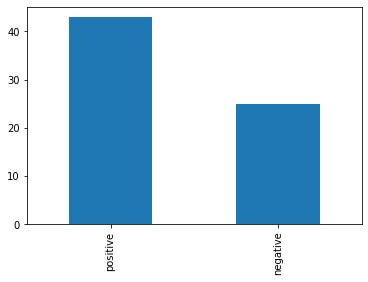

In [156]:
df_clean.sentiment[df.sentimentTextBlob!=0].value_counts().plot(kind='bar')

## Uso de AWS con Comprehend

### Configuración de API y conección

Primero hay que crear un fichero con la configuración de las claves de uusario de AWS.

Crear un usuario en el servicio IAM, crearle una clave de acceso, se puede descagar el fichero .csv o copiar la clave desde ahí.

Crear un fichero .txt con esta estructura:

[default]

aws_access_key_id=

aws_secret_access_key=

[Referencia:](https://docs.aws.amazon.com/cli/latest/userguide/cli-configure-files.html)

Copiemos el fichero en una carpeta en nuestro Drive, activemos el drive y comencemos:

In [69]:
!mkdir -p ~/.aws &&\
  cp /content/drive/My\ Drive/AWS/credencials.txt ~/.aws/credentials

Probar API con un ejemplo sencillo de análisis de sentimientos en una frase.
Para esto usaremos el servicio de Comprehend de AWS 

In [70]:
import boto3
comprehend = boto3.client(service_name='comprehend', region_name="us-east-2")
text = "Este curso es una maravilla. Las clases virtuales también son buenas"
sentiment=comprehend.detect_sentiment(Text=text, LanguageCode='es')
print(sentiment)

{'Sentiment': 'POSITIVE', 'SentimentScore': {'Positive': 0.9995027780532837, 'Negative': 3.235445183236152e-05, 'Neutral': 0.0004632946220226586, 'Mixed': 1.4984062772782636e-06}, 'ResponseMetadata': {'RequestId': 'd8429903-2c1b-477e-8fa6-6864e2563623', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': 'd8429903-2c1b-477e-8fa6-6864e2563623', 'content-type': 'application/x-amz-json-1.1', 'content-length': '166', 'date': 'Wed, 02 Sep 2020 23:15:54 GMT'}, 'RetryAttempts': 0}}


Como se puede ver en el resultado tenemos el sentimiento y el score para cada uno, entre: Mixto, Negativo, Neutral y Positivo.

In [99]:
print(sentiment['Sentiment'])
s=sentiment['Sentiment'][0]+sentiment['Sentiment'][1:].lower()
print(s)
sentiment['SentimentScore'][s]

POSITIVE
Positive


0.9995027780532837

In [71]:
comprehend = boto3.client(service_name='comprehend', region_name="us-east-2")
def detect_Sentiment_AWS(comprehend,text):
  sentiment=comprehend.detect_sentiment(Text=text, LanguageCode='es')
  s=sentiment['Sentiment'][0]+sentiment['Sentiment'][1:].lower()
  return [sentiment['Sentiment'], sentiment['SentimentScore'][s]]

In [54]:
df_clean['Sent_AWS']=df_clean['tweet'].apply(lambda text: detect_Sentiment_AWS(comprehend,text))

In [55]:
df_clean.head()

,Unnamed: 0,tweet,user,user_followers,user_location,fav_count,rt_count,tweet_date,hashtags,mentions,sentiment,Sent_AWS
0,0,se ven mejor gorditas yo no sé porque el perjuicio de la delgadez si así gorditas se ven muy bien,Karol Mejia,230,Colombia,0,0,2020-09-01 15:59:14,[],"['CaracolTV', 'Regias']","( , s, e, , v, e, n, , m, e, j, o, r, , g, o, r, d, i, t, a, s, , y, o, , n, o, , s, é, , p, o, r, q, u, e, , e, l, , p, e, r, j, u, i, c, i, o, , d, e, , l, a, , d, e, l, g, a, d, e, z, , s, i, , a, s, í, , g, o, r, d, i, t, a, s, , s, e, , v, e, n, , m, u, y, , b, i, e, n, )","[POSITIVE, 0.7599148154258728]"
1,1,y a las en saludos ministro,Daniel Pérez,72144,"Bogota, Colombia",2,0,2020-09-01 15:56:46,['CiclismoEntreGrandes'],"['LucenErnesto', 'NairoQuinCo', 'SupermanlopezN', 'Eganbernal', 'CaracolTV', 'infopresidencia', 'MinDeporteCol', 'fedeciclismocol', 'WinSportsTV']","( , y, , a, , l, a, s, , e, n, , s, a, l, u, d, o, s, , m, i, n, i, s, t, r, o, )","[NEUTRAL, 0.8070828318595886]"
2,2,gran trabajo de nuestros ciclistas en la etapa de hoy y ¡entregándolo todo hasta el final,Ernesto Lucena,10822,NaN,4,0,2020-09-01 15:55:30,['TourDeFrancia'],"['NairoQuinCo', 'SupermanlopezN', 'Eganbernal', 'CaracolTV']","(g, r, a, n, , t, r, a, b, a, j, o, , d, e, , n, u, e, s, t, r, o, s, , c, i, c, l, i, s, t, a, s, , e, n, , l, a, , e, t, a, p, a, , d, e, , h, o, y, , y, , , ¡, e, n, t, r, e, g, á, n, d, o, l, o, , t, o, d, o, , h, a, s, t, a, , e, l, , f, i, n, a, l, , )","[POSITIVE, 0.942391037940979]"
3,3,por favor nesesitamos ayuda estamos pasando por una situación muy difícil no tengo comida para mis niños ayudennos por favor nesesitamos alimentacion,Lindarys Mejiarobles,48,"Bogotá, D.C., Colombia",0,0,2020-09-01 15:53:57,[],"['CaracolTV', 'Regias']","( , p, o, r, , f, a, v, o, r, , n, e, s, e, s, i, t, a, m, o, s, , a, y, u, d, a, , e, s, t, a, m, o, s, , p, a, s, a, n, d, o, , p, o, r, , u, n, a, , s, i, t, u, a, c, i, ó, n, , m, u, y, , d, i, f, í, c, i, l, , n, o, , t, e, n, g, o, , c, o, m, i, d, a, , p, a, r, a, , m, i, s, , ...)","[NEGATIVE, 0.6846625804901123]"
4,4,pero ud quiere que legalizar esa mierda y con ayuda de los medios afines al terrorismo como que tal le párese esta fabulosa información sesgada al terrorismo,pensaren plata,126,Colombia,0,0,2020-09-01 15:50:59,[],"['CarlosFGalan', 'COL_EJERCITO', 'CaracolTV', 'ghitis', 'ArgiroCasta58', 'CancinoAbog']","( , p, e, r, o, , u, d, , q, u, i, e, r, e, , q, u, e, , l, e, g, a, l, i, z, a, r, , e, s, a, , m, i, e, r, d, a, , y, , c, o, n, , a, y, u, d, a, , d, e, , l, o, s, , m, e, d, i, o, s, , a, f, i, n, e, s, , a, l, , t, e, r, r, o, r, i, s, m, o, , c, o, m, o, , q, u, e, , t, a, l, ...)","[NEGATIVE, 0.7823030948638916]"


In [94]:
# Dividir la columna Sent_AWS
df_clean[['sentimentAWS','polarityAWS']] = pd.DataFrame(df_clean.Sent_AWS.tolist(), index= df_clean.index)

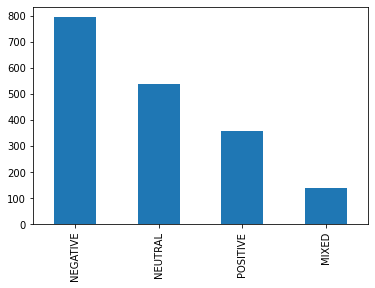

In [96]:
df_clean.sentimentAWS.value_counts().plot(kind='bar')

In [107]:
comprehend.detect_dominant_language(Text=text)

{'Languages': [{'LanguageCode': 'es', 'Score': 0.9921553730964661}],
 'ResponseMetadata': {'HTTPHeaders': {'content-length': '64',
   'content-type': 'application/x-amz-json-1.1',
   'date': 'Tue, 01 Sep 2020 20:25:39 GMT',
   'x-amzn-requestid': '36438f4a-94ad-44d0-a549-3318e724aa09'},
  'HTTPStatusCode': 200,
  'RequestId': '36438f4a-94ad-44d0-a549-3318e724aa09',
  'RetryAttempts': 0}}

In [103]:
comprehend.detect_syntax(Text=text,LanguageCode='es')

{'ResponseMetadata': {'HTTPHeaders': {'content-length': '1425',
   'content-type': 'application/x-amz-json-1.1',
   'date': 'Tue, 01 Sep 2020 20:23:52 GMT',
   'x-amzn-requestid': 'fee04550-8bb9-472f-867c-b630558b12c3'},
  'HTTPStatusCode': 200,
  'RequestId': 'fee04550-8bb9-472f-867c-b630558b12c3',
  'RetryAttempts': 0},
 'SyntaxTokens': [{'BeginOffset': 0,
   'EndOffset': 4,
   'PartOfSpeech': {'Score': 0.9989209175109863, 'Tag': 'DET'},
   'Text': 'Este',
   'TokenId': 1},
  {'BeginOffset': 5,
   'EndOffset': 10,
   'PartOfSpeech': {'Score': 0.9957601428031921, 'Tag': 'NOUN'},
   'Text': 'curso',
   'TokenId': 2},
  {'BeginOffset': 11,
   'EndOffset': 13,
   'PartOfSpeech': {'Score': 0.9999927282333374, 'Tag': 'VERB'},
   'Text': 'es',
   'TokenId': 3},
  {'BeginOffset': 14,
   'EndOffset': 17,
   'PartOfSpeech': {'Score': 0.9988611936569214, 'Tag': 'DET'},
   'Text': 'una',
   'TokenId': 4},
  {'BeginOffset': 18,
   'EndOffset': 27,
   'PartOfSpeech': {'Score': 0.9865432977676392, 

In [108]:
comprehend.detect_entities(Text=text,LanguageCode='es')

{'Entities': [],
 'ResponseMetadata': {'HTTPHeaders': {'content-length': '15',
   'content-type': 'application/x-amz-json-1.1',
   'date': 'Tue, 01 Sep 2020 20:26:41 GMT',
   'x-amzn-requestid': 'de45c725-6ffc-425e-812f-7c0410898735'},
  'HTTPStatusCode': 200,
  'RequestId': 'de45c725-6ffc-425e-812f-7c0410898735',
  'RetryAttempts': 0}}

In [109]:
comprehend.detect_entities(Text='Colombia es un país maravilloso',LanguageCode='es')

{'Entities': [{'BeginOffset': 0,
   'EndOffset': 8,
   'Score': 0.9445917010307312,
   'Text': 'Colombia',
   'Type': 'LOCATION'}],
 'ResponseMetadata': {'HTTPHeaders': {'content-length': '109',
   'content-type': 'application/x-amz-json-1.1',
   'date': 'Tue, 01 Sep 2020 20:27:48 GMT',
   'x-amzn-requestid': 'bb0e4aec-c054-4f84-a0a4-33318df8110b'},
  'HTTPStatusCode': 200,
  'RequestId': 'bb0e4aec-c054-4f84-a0a4-33318df8110b',
  'RetryAttempts': 0}}

Para traducir texto amazon tiene otra API

In [110]:
translate = boto3.client(service_name='translate', region_name="us-east-2")
result = translate.translate_text(Text=text,SourceLanguageCode="es", TargetLanguageCode="en")
result

{'ResponseMetadata': {'HTTPHeaders': {'cache-control': 'no-cache',
   'content-length': '134',
   'content-type': 'application/x-amz-json-1.1',
   'date': 'Tue, 01 Sep 2020 20:36:25 GMT',
   'x-amzn-requestid': 'b7ed6dc7-f269-4730-a04c-0bec87f8c886'},
  'HTTPStatusCode': 200,
  'RequestId': 'b7ed6dc7-f269-4730-a04c-0bec87f8c886',
  'RetryAttempts': 0},
 'SourceLanguageCode': 'es',
 'TargetLanguageCode': 'en',
 'TranslatedText': 'This course is a wonderful one. Virtual classes are also good'}

In [111]:
result['TranslatedText']

'This course is a wonderful one. Virtual classes are also good'

## Análisis de sentimientos con Google Cloud

In [15]:
!pip install google.cloud.language

     |████████████████████████████████| 92kB 2.5MB/s 


In [16]:
import google.cloud.language as language
from google.cloud.language import enums
from google.cloud.language import types

Debe habilitar la API de Language

Debe configurar la pantalla de consentimiento de OAuth

Crear una cuenta de servicio y guardar las credenciales en un .json

In [17]:
import os
#Cargar el json que descargamos de la cuenta de servicio
os.environ['GOOGLE_APPLICATION_CREDENTIALS']='/content/drive/My Drive/Analitics_Esp/googleapipython.json'

In [18]:
client = language.LanguageServiceClient()

In [182]:
encoding_type = enums.EncodingType.UTF8
type_document=enums.Document.Type.PLAIN_TEXT
lang='es'
text="Este grupo es súper malo"
document = types.Document(
        content=text,
        type=type_document,
        language=lang
        )
response= client.analyze_sentiment(document=document,encoding_type=encoding_type)

In [183]:
response

document_sentiment {
  magnitude: 0.699999988079071
  score: -0.699999988079071
}
language: "es"
sentences {
  text {
    content: "Este grupo es s\303\272per malo"
  }
  sentiment {
    magnitude: 0.699999988079071
    score: -0.699999988079071
  }
}

In [185]:
score = response.document_sentiment.score
magnitude = response.document_sentiment.magnitude
for index, sentence in enumerate(response.sentences):
    sentence_sentiment = sentence.sentiment.score
    sentence_magnitude = sentence.sentiment.magnitude
    print('{} : score: {} magnitud: {}'.format(sentence.text.content, sentence_sentiment, sentence_magnitude))
s= 'Positivo'
print('Sentimiento general: ',score)

Este grupo es súper malo : score: -0.699999988079071 magnitud: 0.699999988079071
Sentimiento general:  -0.699999988079071


In [117]:
text='Esto está mal'
document = types.Document(content=text,type=type_document,language=lang)
response= client.analyze_sentiment(document=document,encoding_type=encoding_type)
response

document_sentiment {
  magnitude: 0.5
  score: -0.5
}
language: "es"
sentences {
  text {
    content: "Esto est\303\241 mal"
  }
  sentiment {
    magnitude: 0.5
    score: -0.5
  }
}

In [125]:
client.analyze_entity_sentiment(document=document,encoding_type=encoding_type)

entities {
  name: "curso"
  type: OTHER
  salience: 0.4793348014354706
  mentions {
    text {
      content: "curso"
      begin_offset: 5
    }
    type: COMMON
    sentiment {
      magnitude: 0.8999999761581421
      score: 0.8999999761581421
    }
  }
  sentiment {
    magnitude: 0.8999999761581421
    score: 0.8999999761581421
  }
}
entities {
  name: "maravilla"
  type: OTHER
  salience: 0.34490063786506653
  mentions {
    text {
      content: "maravilla"
      begin_offset: 18
    }
    type: COMMON
    sentiment {
      magnitude: 0.800000011920929
      score: 0.800000011920929
    }
  }
  sentiment {
    magnitude: 0.800000011920929
    score: 0.800000011920929
  }
}
entities {
  name: "clases"
  type: OTHER
  salience: 0.17576457560062408
  mentions {
    text {
      content: "clases"
      begin_offset: 33
    }
    type: COMMON
    sentiment {
      magnitude: 0.8999999761581421
      score: 0.8999999761581421
    }
  }
  sentiment {
    magnitude: 0.8999999761581421


Evaluar los tweets.

In [186]:
client = language.LanguageServiceClient()
def detect_Sentiment_Google(client,text):
  document = types.Document(
        content=text,
        type=enums.Document.Type.PLAIN_TEXT,
        language='es'
        )
  response=client.analyze_sentiment(document=document,encoding_type=enums.EncodingType.UTF8)
  score = response.document_sentiment.score
  magnitude = response.document_sentiment.magnitude
  sent= 'POSITIVE' if score>0.25 else 'NEGATIVE' if score<=-0.25 else 'NEUTRAL'
  return [sent, score]

In [187]:
detect_Sentiment_Google(client,text)

['NEGATIVE', -0.699999988079071]

In [188]:
import time

In [145]:
sentimentGoogle=[]
scoreGoogle=[]
i=0
for t in df_clean['tweet']:
  if i>500:
    time.sleep(65)
    i=0
  sent, score=detect_Sentiment_Google(client,t)
  sentimentGoogle.append(sent)
  scoreGoogle.append(score)
  i=i+1

In [146]:
df_clean['sentimentGoogle']=sentimentGoogle
df_clean['polarityGoogle']=scoreGoogle

In [ ]:
#df_clean['Sent_Google']=df_clean['tweet'].apply(lambda text: detect_Sentiment_Google(client,text))

In [194]:
df_clean.head(7)

,Unnamed: 0,tweet,user,user_followers,user_location,fav_count,rt_count,tweet_date,hashtags,mentions,sentiment,Sent_AWS,sentimentTextBlob,TextBlob,sentimentAWS,polarityAWS,sentimentGoogle,polarityGoogle
0,0,se ven mejor gorditas yo no sé porque el perjuicio de la delgadez si así gorditas se ven muy bien,Karol Mejia,230,Colombia,0,0,2020-09-01 15:59:14,[],"['CaracolTV', 'Regias']",neutral,"[POSITIVE, 0.7599148154258728]",0.0,"( , s, e, , v, e, n, , m, e, j, o, r, , g, o, r, d, i, t, a, s, , y, o, , n, o, , s, é, , p, o, r, q, u, e, , e, l, , p, e, r, j, u, i, c, i, o, , d, e, , l, a, , d, e, l, g, a, d, e, z, , s, i, , a, s, í, , g, o, r, d, i, t, a, s, , s, e, , v, e, n, , m, u, y, , b, i, e, n, )",POSITIVE,0.759915,POSITIVE,0.9
1,1,y a las en saludos ministro,Daniel Pérez,72144,"Bogota, Colombia",2,0,2020-09-01 15:56:46,['CiclismoEntreGrandes'],"['LucenErnesto', 'NairoQuinCo', 'SupermanlopezN', 'Eganbernal', 'CaracolTV', 'infopresidencia', 'MinDeporteCol', 'fedeciclismocol', 'WinSportsTV']",neutral,"[NEUTRAL, 0.8070828318595886]",0.0,"( , y, , a, , l, a, s, , e, n, , s, a, l, u, d, o, s, , m, i, n, i, s, t, r, o, )",NEUTRAL,0.807083,POSITIVE,0.5
2,2,gran trabajo de nuestros ciclistas en la etapa de hoy y ¡entregándolo todo hasta el final,Ernesto Lucena,10822,NaN,4,0,2020-09-01 15:55:30,['TourDeFrancia'],"['NairoQuinCo', 'SupermanlopezN', 'Eganbernal', 'CaracolTV']",neutral,"[POSITIVE, 0.942391037940979]",0.0,"(g, r, a, n, , t, r, a, b, a, j, o, , d, e, , n, u, e, s, t, r, o, s, , c, i, c, l, i, s, t, a, s, , e, n, , l, a, , e, t, a, p, a, , d, e, , h, o, y, , y, , , ¡, e, n, t, r, e, g, á, n, d, o, l, o, , t, o, d, o, , h, a, s, t, a, , e, l, , f, i, n, a, l, , )",POSITIVE,0.942391,POSITIVE,0.9
3,3,por favor nesesitamos ayuda estamos pasando por una situación muy difícil no tengo comida para mis niños ayudennos por favor nesesitamos alimentacion,Lindarys Mejiarobles,48,"Bogotá, D.C., Colombia",0,0,2020-09-01 15:53:57,[],"['CaracolTV', 'Regias']",neutral,"[NEGATIVE, 0.6846625804901123]",0.0,"( , p, o, r, , f, a, v, o, r, , n, e, s, e, s, i, t, a, m, o, s, , a, y, u, d, a, , e, s, t, a, m, o, s, , p, a, s, a, n, d, o, , p, o, r, , u, n, a, , s, i, t, u, a, c, i, ó, n, , m, u, y, , d, i, f, í, c, i, l, , n, o, , t, e, n, g, o, , c, o, m, i, d, a, , p, a, r, a, , m, i, s, , ...)",NEGATIVE,0.684663,NEUTRAL,-0.2
4,4,pero ud quiere que legalizar esa mierda y con ayuda de los medios afines al terrorismo como que tal le párese esta fabulosa información sesgada al terrorismo,pensaren plata,126,Colombia,0,0,2020-09-01 15:50:59,[],"['CarlosFGalan', 'COL_EJERCITO', 'CaracolTV', 'ghitis', 'ArgiroCasta58', 'CancinoAbog']",neutral,"[NEGATIVE, 0.7823030948638916]",0.0,"( , p, e, r, o, , u, d, , q, u, i, e, r, e, , q, u, e, , l, e, g, a, l, i, z, a, r, , e, s, a, , m, i, e, r, d, a, , y, , c, o, n, , a, y, u, d, a, , d, e, , l, o, s, , m, e, d, i, o, s, , a, f, i, n, e, s, , a, l, , t, e, r, r, o, r, i, s, m, o, , c, o, m, o, , q, u, e, , t, a, l, ...)",NEGATIVE,0.782303,NEGATIVE,-0.3
5,5,que bueno seria que volviera el programa cine arte que todos los viernes por la noche siempre habia una nueva película para ver y que mejor que lo conduzca un experto en cine,camilo muete🇨🇴,63,BOGOTA COLOMBIA,0,0,2020-09-01 15:48:05,[],"['CaracolTV', 'LUISCARLOSRUEDA']",neutral,"[POSITIVE, 0.5409678220748901]",0.0,"( , q, u, e, , b, u, e, n, o, , s, e, r, i, a, , q, u, e, , v, o, l, v, i, e, r, a, , e, l, , p, r, o, g, r, a, m, a, , c, i, n, e, , a, r, t, e, , q, u, e, , t, o, d, o, s, , l, o, s, , v, i, e, r, n, e, s, , p, o, r, , l, a, , n, o, c, h, e, , s, i, e, m, p, r, e, , h, a, b, i, a, ...)",POSITIVE,0.540968,POSITIVE,0.6
6,6,con este texto pensé q hablaban de testigos contra auv,Rocio,132,NaN,0,0,2020-09-01 15:43:11,[],"['CaracolTV', 'CaracolPlay']",neutral,"[NEGATIVE, 0.708642840385437]",0.0,"( , c, o, n, , e, s, t, e, , t, e, x, t, o, , p, e, n, s, é, , q, , h, a, b, l, a, b, a, n, , d, e, , t, e, s, t, i, g, o, s, , c, o, n, t, r, a, , a, u, v)",NE

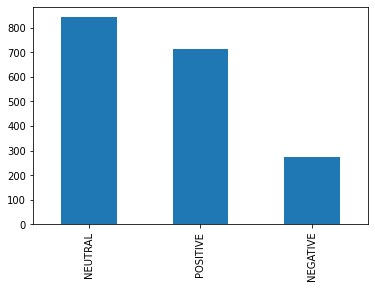

In [148]:
df_clean['sentimentGoogle'].value_counts().plot(kind='bar')

In [151]:
df_clean[df_clean['sentimentGoogle']=='POSITIVE']['tweet']

0                                                                                     se ven mejor gorditas yo no sé porque el perjuicio de la delgadez si así gorditas se ven muy bien 
1                                                                                                                                                           y a las en saludos ministro 
2                                                                                           gran trabajo de nuestros ciclistas en la etapa de hoy y  ¡entregándolo todo hasta el final  
5        que bueno seria que volviera el programa cine arte que todos los viernes por la noche siempre habia una nueva película para ver y que mejor que lo conduzca un experto en cine 
8                                                                                            son actrices de categoría y presumen mansiones y camionetas será que trabajan en hollywood 
                                                                           

In [126]:
client.analyze_syntax(document=document)

sentences {
  text {
    content: "Este curso es una maravilla."
    begin_offset: -1
  }
}
sentences {
  text {
    content: "Las clases virtuales tambi\303\251n son buenas"
    begin_offset: -1
  }
}
tokens {
  text {
    content: "Este"
    begin_offset: -1
  }
  part_of_speech {
    tag: DET
    gender: MASCULINE
    number: SINGULAR
    proper: NOT_PROPER
  }
  dependency_edge {
    head_token_index: 1
    label: DET
  }
  lemma: "Este"
}
tokens {
  text {
    content: "curso"
    begin_offset: -1
  }
  part_of_speech {
    tag: NOUN
    gender: MASCULINE
    number: SINGULAR
    proper: NOT_PROPER
  }
  dependency_edge {
    head_token_index: 2
    label: NSUBJ
  }
  lemma: "curso"
}
tokens {
  text {
    content: "es"
    begin_offset: -1
  }
  part_of_speech {
    tag: VERB
    aspect: IMPERFECTIVE
    mood: INDICATIVE
    number: SINGULAR
    person: THIRD
    proper: NOT_PROPER
    tense: PRESENT
    voice: ACTIVE
  }
  dependency_edge {
    head_token_index: 2
    label: ROO

Traducir texto con google cloud

In [19]:
from google.cloud import translate

In [20]:
client = translate.Client()

In [39]:
client.detect_language(['Soy feliz', "I'm happy"])

[{'confidence': 1, 'input': 'Soy feliz', 'language': 'es'},
 {'confidence': 1, 'input': "I'm happy", 'language': 'en'}]

In [38]:
client.translate('koszula',target_language='es')

{'detectedSourceLanguage': 'pl',
 'input': 'koszula',
 'translatedText': 'camisa'}

## Análisis de sentimientos con Emojis

In [4]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import tweepy
import nltk
from textblob import TextBlob
import re

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
pd.set_option('display.max_colwidth',2000)
path='/content/drive/My Drive/Analitics_Esp/'
df = pd.read_csv(path+'SearchCaracolTV_.csv', encoding='utf-8-sig')

In [8]:
import re
df_clean=clean_text(df,'tweet')

In [9]:
df[['tweet']].head(20)

,tweet
0,se ven mejor gorditas... yo no sé porque el perjuicio de la delgadez si así gorditas se ven muy bien.
1,y a las : en saludos ministro.
2,"🚴🏾‍♂️gran trabajo de nuestros ciclistas en la etapa de hoy: , y 🇨🇴. ¡entregándolo todo hasta el final! 🇫🇷"
3,por favor nesesitamos ayuda estamos pasando por una situación muy difícil no tengo comida para mis niños ayudennos por favor nesesitamos alimentacion 😭🙏
4,pero ud quiere que legalizar esa mierda !! y con ayuda de los medios afines al terrorismo como . ? que tal le párese esta fabulosa información sesgada al terrorismo ?
5,que bueno seria que volviera el programa cine arte que todos los viernes por la noche siempre habia una nueva película para ver y que mejor que lo conduzca un experto en cine
6,"con este texto, pensé q hablaban de testigos contra auv"
7,"los aviones del descaro , este gobierno no le corre sangre por la cara, les corre por los campos"
8,"son actrices de categoría y presumen mansiones y camionetas, será que trabajan en hollywood?"
9,"y por los medios como que su noticia ""mueren"" y no lo califica como asesinato o masacre. medios politizados, idiogilizados y lo peor, el asesinato de nuestros ""heroes"", por este es una noticia sin importancia... que asco produce."


La otra opción es llevarlo a unicode

In [25]:
tUNICODE=t.encode('unicode-escape')
tUNICODE

b'@CaracolTV @Regias Por favor nesesitamos ayuda estamos pasando por una situaci\\xf3n muy dif\\xedcil no tengo comida para mis Ni\\xf1os ayudennos por favor nesesitamos alimentacion \\U0001f62d\\U0001f64f'

Con la biblioteca emoji

In [8]:
!pip install emoji

     |████████████████████████████████| 51kB 1.7MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49716 sha256=3a7523171689140259e5a8603c436bc27f7098e0bb9030076df162ff45ded783
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built emoji


In [9]:
import emoji
from emoji.unicode_codes import UNICODE_EMOJI

In [12]:
emo = '😊'
textEmo=UNICODE_EMOJI[emo]
textEmo

':smiling_face_with_smiling_eyes:'

In [13]:
textEmo=textEmo.replace('_',' ')
textEmo

':smiling face with smiling eyes:'

In [21]:
client = translate.Client()
textEmoEsp=client.translate(textEmo,target_language='es')
textEmoEsp['translatedText']

': rostro sonriente con ojos sonrientes:'

In [11]:
from collections import Counter

Podemos buscar todos los emojis en un texto y contar sus apariciones.

In [32]:
df_clean['tweet'][3]

' por favor nesesitamos ayuda estamos pasando por una situación muy difícil no tengo comida para mis niños ayudennos por favor nesesitamos alimentacion 😭🙏'

In [64]:
listEmojis=emoji.get_emoji_regexp().findall(dcopy['tweet'][11])
listEmojis

['🇨🇴', '🇫🇷', '🚴', '🇫🇷', '🚴', '🎾', '🇺🇸', '♀️', '🇯🇵', '🆚', '🇪🇸', '🗣️', '📺']

In [103]:
listEmojis=emoji.get_emoji_regexp().findall(dcopy['tweet'][3])
c = Counter(listEmojis)
c.items()

dict_values([1, 1])

Para sustituir los emojis podemos traducir la descripción a español y sustituirla.

In [66]:
t=df_clean['tweet'][11]
listEmojis=emoji.get_emoji_regexp().findall(t)
tnew=t
for e in listEmojis:
  textEmo=UNICODE_EMOJI[e]
  textEmo=textEmo.replace('_',' ')
  textEmoEsp=client.translate(textEmo,target_language='es')
  enew=textEmoEsp['translatedText']
  tnew=re.sub(u''+e,enew, tnew)
  tnew=tnew.replace(':', ', ')
  tnew=re.sub(r'\s+',' ',tnew)
  tnew=re.sub(r'(^\s|\s$)+','',tnew)
tnew

'que ve tv, Colombia, ? , Francia, , persona en bicicleta, , Francia, , persona en bicicleta, , tenis, , Estados Unidos, , selector de signo femenino, , Japón, hibino, Botón VS, , España, muguruza , selector de cabeza parlante, , televisión,'

In [58]:
def sub_emoji_text(tweet,client):
  listEmojis=emoji.get_emoji_regexp().findall(tweet)
  tnew=tweet
  for e in listEmojis:
    textEmo=UNICODE_EMOJI[e]
    textEmo=textEmo.replace('_',' ')
    textEmoEsp=client.translate(textEmo,target_language='es')
    enew=textEmoEsp['translatedText']
    tnew=re.sub(u''+e,enew, tnew)
    tnew=tnew.replace(':', ', ')
    tnew=re.sub(r'\s+',' ',tnew)
    tnew=re.sub(r'(^\s|\s$)+','',tnew)
  return tnew

In [14]:
dcopy=df_clean.copy()

In [59]:
client = translate.Client()
df_clean['tweet']=df_clean['tweet'].apply(lambda t: sub_emoji_text(t,client))

In [68]:
df_clean[['tweet']].head(20)

,tweet
0,se ven mejor gorditas... yo no sé porque el perjuicio de la delgadez si así gorditas se ven muy bien.
1,y a las : en saludos ministro.
2,", hombre en bicicleta tono de piel oscuro medio, gran trabajo de nuestros ciclistas en la etapa de hoy, , y , Colombia, . ¡entregándolo todo hasta el final! , Francia,"
3,"por favor nesesitamos ayuda estamos pasando por una situación muy difícil no tengo comida para mis niños ayudennos por favor nesesitamos alimentacion , cara llorando fuerte, , manos juntas,"
4,pero ud quiere que legalizar esa mierda !! y con ayuda de los medios afines al terrorismo como . ? que tal le párese esta fabulosa información sesgada al terrorismo ?
5,que bueno seria que volviera el programa cine arte que todos los viernes por la noche siempre habia una nueva película para ver y que mejor que lo conduzca un experto en cine
6,"con este texto, pensé q hablaban de testigos contra auv"
7,"los aviones del descaro , este gobierno no le corre sangre por la cara, les corre por los campos"
8,"son actrices de categoría y presumen mansiones y camionetas, será que trabajan en hollywood?"
9,"y por los medios como que su noticia ""mueren"" y no lo califica como asesinato o masacre. medios politizados, idiogilizados y lo peor, el asesinato de nuestros ""heroes"", por este es una noticia sin importancia... que asco produce."


In [72]:
df_clean['Sent_AWS']=df_clean['tweet'].apply(lambda text: detect_Sentiment_AWS(comprehend,text))

In [73]:
df_clean[['sentimentAWS','polarityAWS']] = pd.DataFrame(df_clean.Sent_AWS.tolist(), index= df_clean.index)

In [75]:
df_clean.sentimentAWS.value_counts()

NEGATIVE    742
NEUTRAL     576
POSITIVE    393
MIXED       117
Name: sentimentAWS, dtype: int64

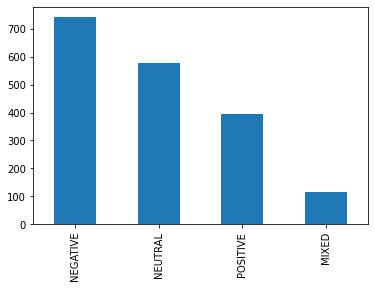

In [74]:
df_clean.sentimentAWS.value_counts().plot(kind='bar')

Cuáles son los emojis que más se repiten en el texto?

In [20]:
all_emojis=[]
for t in dcopy.tweet:
  listEmojis=emoji.get_emoji_regexp().findall(t)
  if len(listEmojis)>0:
    all_emojis.extend(listEmojis)

In [21]:
c = Counter(all_emojis)
c.most_common(20)

[('😂', 81),
 ('🤣', 55),
 ('🇨🇴', 50),
 ('😍', 32),
 ('😡', 30),
 ('📺', 26),
 ('👏', 25),
 ('😭', 21),
 ('🤔', 15),
 ('⚽', 12),
 ('😅', 11),
 ('♥️', 11),
 ('🇫🇷', 10),
 ('🚴🏼\u200d♂️', 10),
 ('🚴', 9),
 ('\U0001f92e', 9),
 ('❤️', 9),
 ('🇪🇨', 9),
 ('🎊', 9),
 ('🎉', 9)]

In [22]:
import numpy as np

In [32]:
e, count=np.unique(all_emojis,return_counts=True)
count_sort_ind = np.argsort(-count)
e[count_sort_ind]

array(['😂', '🤣', '🇨🇴', '😍', '😡', '📺', '👏', '😭', '🤔', '⚽', '♥️', '😅',
       '🚴🏼\u200d♂️', '🇫🇷', '⭕', '\U0001f92e', '🚴', '🇪🇨', '❤️', '🎉', '🎊',
       '🙄', '👍', '😒', '😘', '💩', '👑', '🔥', '😉', '🚴\u200d♂️', '🙏', '📡',
       '🇹🇷', '🤡', '🤢', '🙌', '😁', '😊', '😱', '😤', '⏰', '💻', '🙌🏼', '💚', '🗣️',
       '😎', '👏🏻', '😫', '\U0001f97a', '➡️', '\U0001f92d', '👉',
       '\U0001f974', '💘', '😐', '🤦\u200d♂️', '😔', '❤', '🤷\u200d♀️', '💞',
       '🤞', '💥', '😢', '🙈', '\U0001f970', '💔', '🚵\u200d♀️', '🎬',
       '🤦🏻\u200d♂️', '💨', '🚲', '💕', '🚴🏻\u200d♂️', '🚵\u200d♂️', '😷', '😥',
       '🤞🏼', '💯', '😌', '🙏🏻', '👍🏻', '🙂', '▶️', '😀', '☕', '\U0001f92f', '😠',
       '😮', '🙋🏽\u200d♀️', '🙊', '😓', '☹️', '😄', '😻', '❓', '❗', '🇧🇪', '🔴',
       '🆚', '😳', '\U0001f92a', '💃', '\U0001f90d', '\U0001f92c', '🐽', '🤥',
       '🐞', '👎', '😨', '🚵', '🚴🏽\u200d♂️', '🤗', '🐆', '🎤', '🐀', '🎭',
       '\U0001f929', '🎥', '🤠', '🏁', '🌟', '🏎️', '💛', '🤚', '😰', '😬', '🧀',
       '\U0001f975', '🤘🏻', '😯', '🤝', '🙏🏽', '😶', '🤓', '🤧', '🙌🏻',
       '🤦🏽\u200d♀️

Otra opción es usar el segundo enfoque para lo cual es necesario preparar una base de conocimientos con tweets (para este caso) que estén previamente etiquetados.

Por ejemplo, se podría usar :

1.   corpus TASS (http://tass.sepln.org/tass_data/download.php) para entrenar un

modelo